
# Covid-19 Overview in Greece

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [New cases graph](#new_cases_graph)
* [New deaths graph](#new_deaths_graph)
* [Total cases graph](#total_cases_graph)
* [Total deaths graph](#total_deaths_graph)
* [Prediction of total cases](#prediction_total_cases)
* [Prediction of total deaths](#prediction_total_deaths)
* [Prediction of new deaths](#prediction_new_deaths)
* [Prediction of new cases](#prediction_new_cases)

# Introduction <a name="introduction"></a>



## Data <a name="data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import scipy
import plotly
import folium
from folium import plugins
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from lime import lime_tabular
import plotly.express as px
import plotly.graph_objects as go
import os

In [2]:
#!wget -nv https://covid19.who.int/WHO-COVID-19-global-data.csv
#print('File downloaded!')
file_name=('cov.csv')
df_raw=pd.read_csv(file_name)
print('File copied to DataFrame!')
#os.remove("WHO-COVID-19-global-data.csv")
#print("File Removed!")

File copied to DataFrame!


In [3]:
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


#### Removing data from all the countries except Greece

In [4]:
df_raw=df_raw[df_raw['Country'].str.contains('Greece')]
df_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,GR,Greece,EURO,0,0,0,0
28270,2020-01-04,GR,Greece,EURO,0,0,0,0
28271,2020-01-05,GR,Greece,EURO,0,0,0,0
28272,2020-01-06,GR,Greece,EURO,0,0,0,0
28273,2020-01-07,GR,Greece,EURO,0,0,0,0


#### Removing unnecessary data columns

In [5]:
df_raw=df_raw.drop(columns=["Country_code", "WHO_region", "Country"])
df_raw.head()

,Date_reported,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Renaming columns

In [6]:
df_raw=df_raw.rename(columns={"Cumulative_cases": "Total_cases", "Cumulative_deaths": "Total_deaths"})
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28269,2020-01-03,0,0,0,0
28270,2020-01-04,0,0,0,0
28271,2020-01-05,0,0,0,0
28272,2020-01-06,0,0,0,0
28273,2020-01-07,0,0,0,0


#### Sorting the dataframe by Date

In [7]:
df_raw=df_raw.sort_values(by='Date_reported', ascending=False)
df_raw.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28620,2020-12-19,916,129633,96,4026
28619,2020-12-18,1155,128717,78,3948
28618,2020-12-17,1190,127562,85,3870
28617,2020-12-16,1199,126372,98,3785
28616,2020-12-15,639,125173,62,3687


#### Converting 'Date_reported' to datetime

In [8]:
df_raw.Date_reported = pd.to_datetime(df_raw.Date_reported).dt.date

In [9]:
df_raw.head(10)

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28620,2020-12-19,916,129633,96,4026
28619,2020-12-18,1155,128717,78,3948
28618,2020-12-17,1190,127562,85,3870
28617,2020-12-16,1199,126372,98,3785
28616,2020-12-15,639,125173,62,3687
28615,2020-12-14,692,124534,85,3625
28614,2020-12-13,1194,123842,68,3540
28613,2020-12-12,1395,122648,102,3472
28612,2020-12-11,1533,121253,81,3370
28611,2020-12-10,1675,119720,95,3289


#### Correcting the deviation of the day

In [10]:
df_copy = df_raw.copy()
df_copy['Date_reported']=df_copy['Date_reported'].shift(-1)
df_copy.head()

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28620,2020-12-18,916,129633,96,4026
28619,2020-12-17,1155,128717,78,3948
28618,2020-12-16,1190,127562,85,3870
28617,2020-12-15,1199,126372,98,3785
28616,2020-12-14,639,125173,62,3687


In [11]:
df_copy = df_copy.iloc[:-310]

In [12]:
df_copy=df_copy.sort_values(by='Total_cases', ascending=True)

In [13]:
df_copy.style.background_gradient(cmap='Reds')

,Date_reported,New_cases,Total_cases,New_deaths,Total_deaths
28579,2020-11-07,2555,54809,34,749
28580,2020-11-08,1889,56698,35,784
28581,2020-11-09,1489,58187,41,825
28582,2020-11-10,2383,60570,41,866
28583,2020-11-11,2751,63321,43,909
28584,2020-11-12,3316,66637,50,959
28585,2020-11-13,3038,69675,38,997
28586,2020-11-14,2835,72510,38,1035
28587,2020-11-15,1695,74205,71,1106
28588,2020-11-16,2198,76403,59,1165


# New cases graph<a name="new_cases_graph"></a>

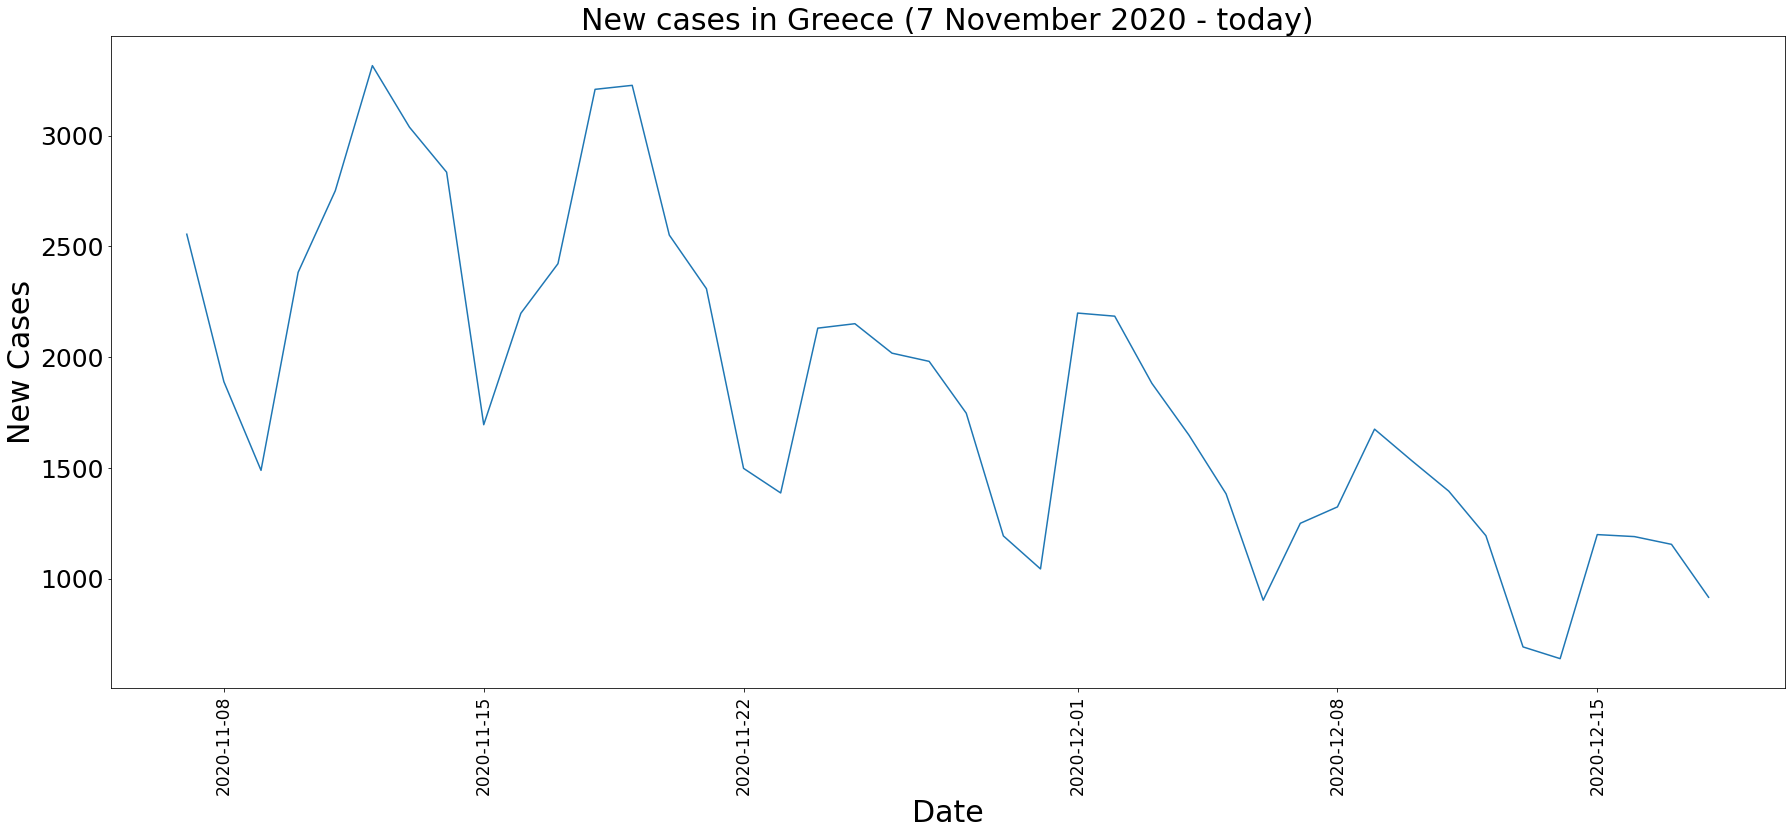

In [14]:
plt.figure(figsize=(30,12))
plt.title('New cases in Greece (7 November 2020 - today)', fontsize=30)
plt.ylabel('New Cases', fontsize=30)
plt.xlabel('Date', fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['New_cases'])

# New deaths graph<a name="new_deaths_graph"></a>

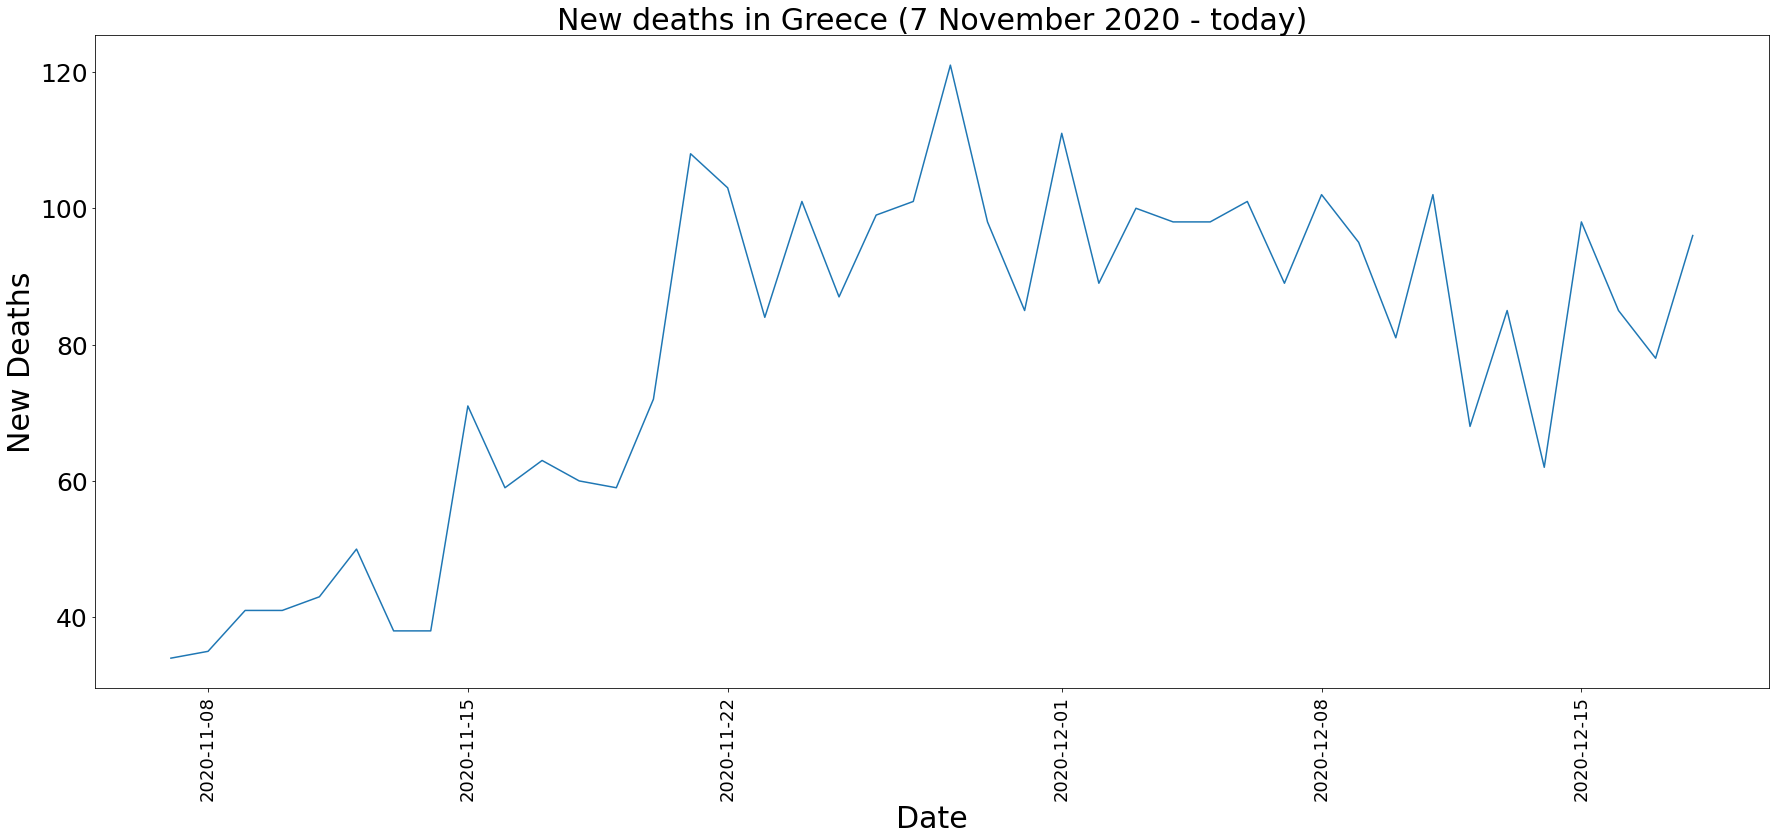

In [15]:
plt.figure(figsize=(30,12))
plt.title('New deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('New Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=25)
plt.tick_params(axis='x', labelsize=18)
plt.plot(df_copy['Date_reported'], df_copy['New_deaths'])

# Total cases graph<a name="total_cases_graph"></a>

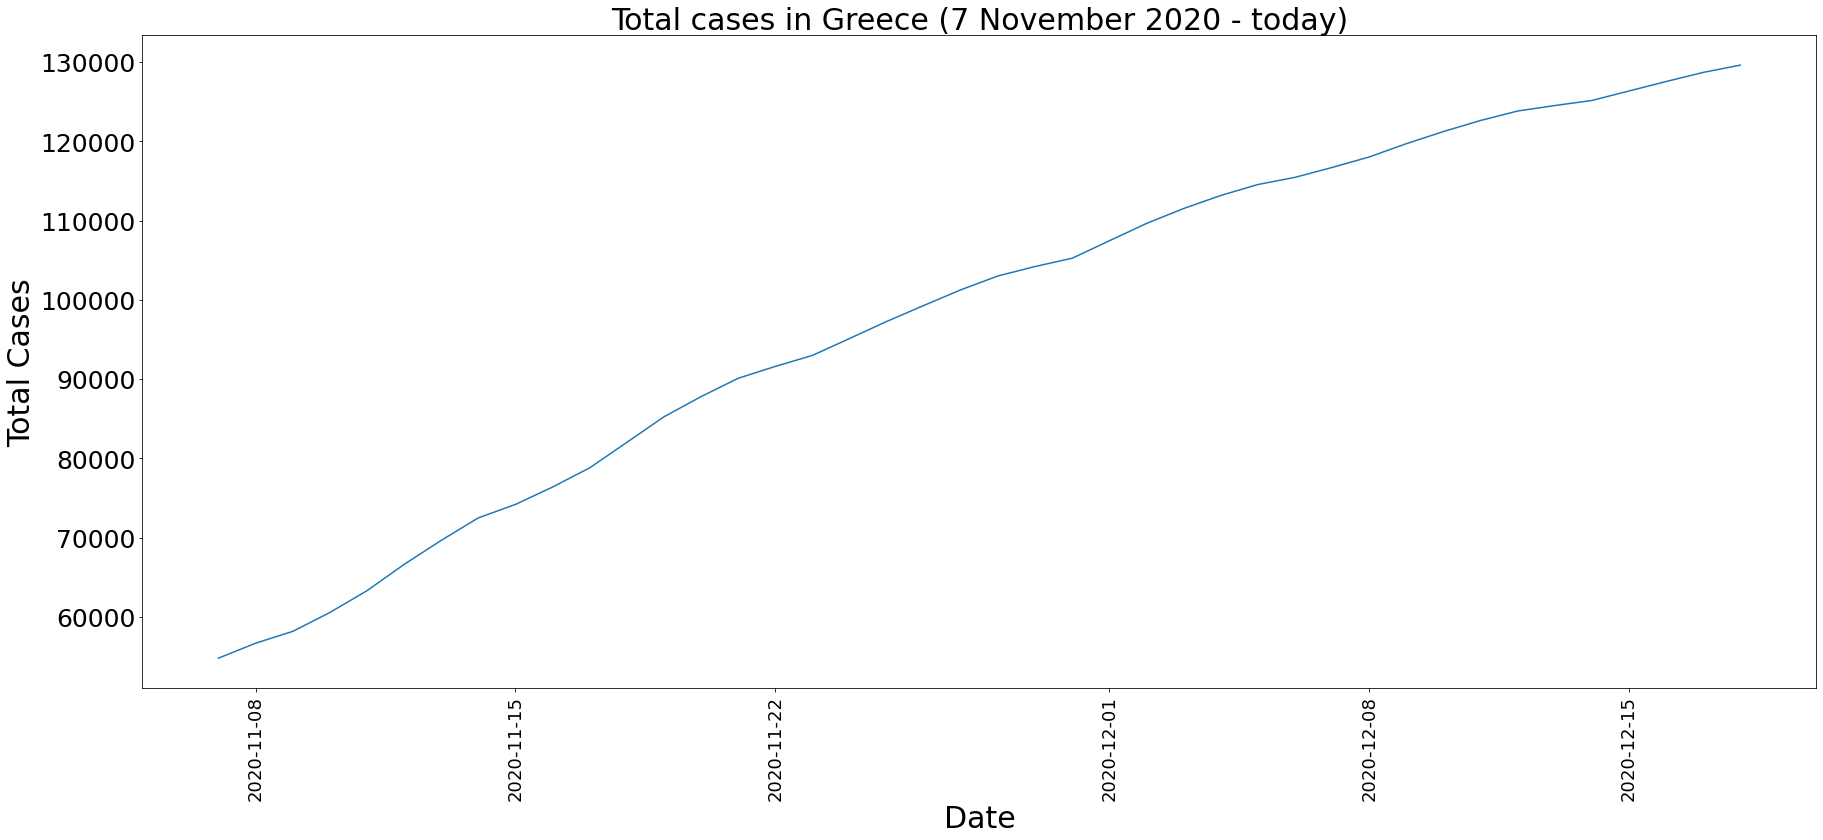

In [16]:
plt.figure(figsize=(30,12))
plt.title('Total cases in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_cases'])

# Total deaths graph<a name="total_deaths_graph"></a>

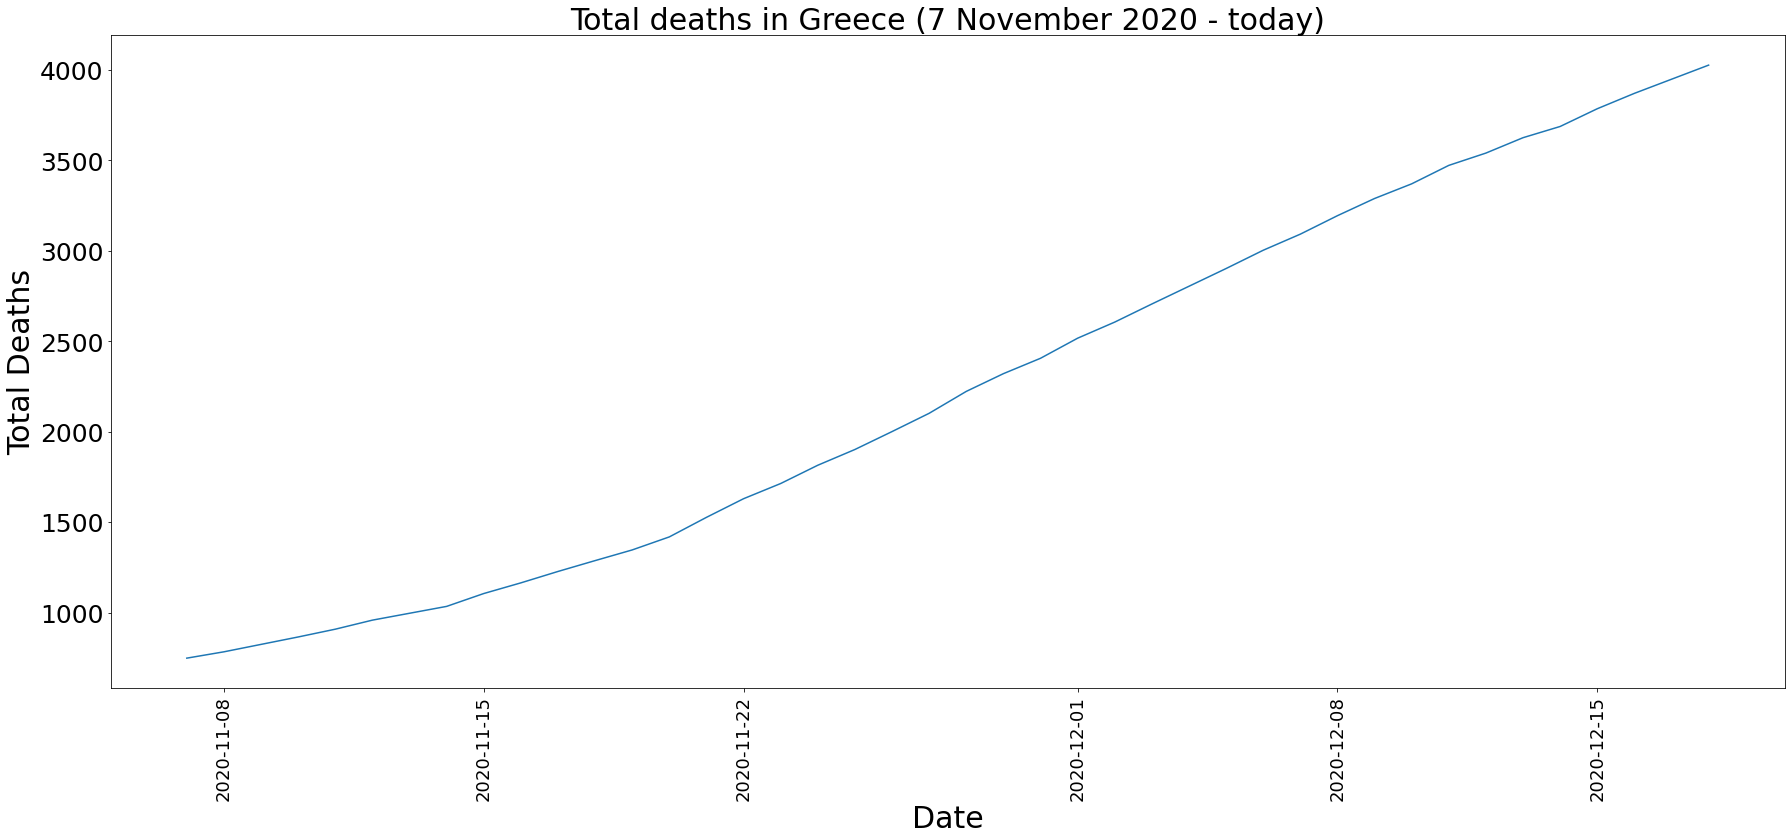

In [17]:
plt.figure(figsize=(30,12))
plt.title('Total deaths in Greece (7 November 2020 - today)',fontsize=30)
plt.ylabel('Total Deaths',fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=25)
plt.plot(df_copy['Date_reported'], df_copy['Total_deaths'])

## Using Prophet to predict covid-19 behavior to 1 week from today

In [18]:
from fbprophet import Prophet

In [19]:
new_cases=df_copy.groupby('Date_reported').sum()['New_cases'].reset_index()
new_deaths=df_copy.groupby('Date_reported').sum()['New_deaths'].reset_index()
total_cases=df_copy.groupby('Date_reported').sum()['Total_cases'].reset_index()
total_deaths=df_copy.groupby('Date_reported').sum()['Total_deaths'].reset_index()

## Prediction of Total Cases<a name="prediction_total_cases"></a>

In [20]:
total_cases.tail()

,Date_reported,Total_cases
37,2020-12-14,125173
38,2020-12-15,126372
39,2020-12-16,127562
40,2020-12-17,128717
41,2020-12-18,129633


In [21]:
total_cases.columns=['ds','y']

In [22]:
m=Prophet(interval_width=0.95)
m.fit(total_cases)
future_total_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
forecast_total_cases=m.predict(future_total_cases)
forecast_total_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
42,2020-12-19,131321.861846,131026.646633,131621.769403
43,2020-12-20,131906.841908,131337.443318,132579.081389
44,2020-12-21,132491.341788,131405.433863,133704.631780
45,2020-12-22,133658.122014,132122.110938,135450.617225


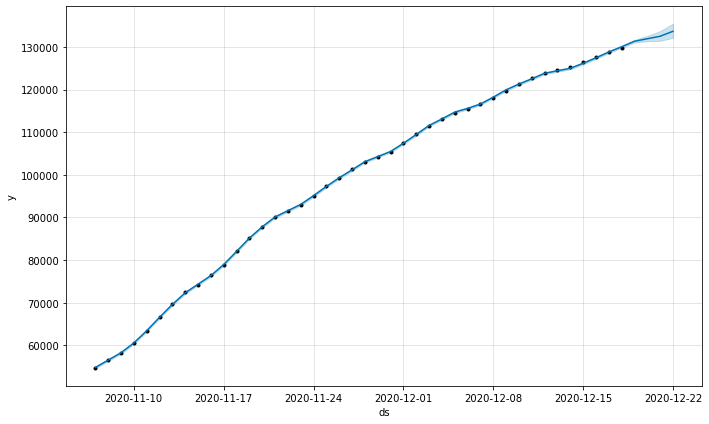

In [24]:
forecast_total_cases_plot=m.plot(forecast_total_cases)

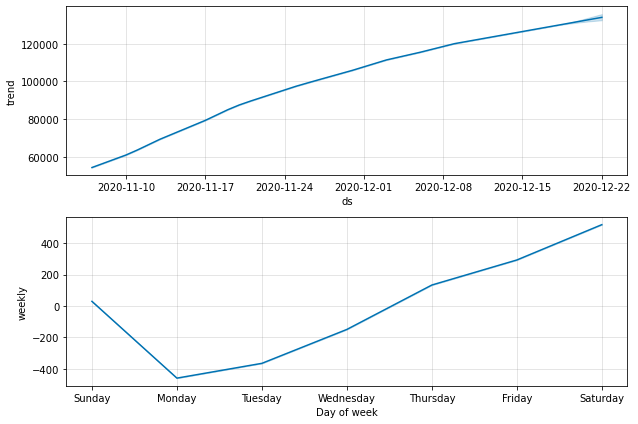

In [25]:
forecast_total_cases_plot=m.plot_components(forecast_total_cases)

## Prediction of total deaths<a name="prediction_total_deaths"></a>

In [26]:
total_deaths.tail()

,Date_reported,Total_deaths
37,2020-12-14,3687
38,2020-12-15,3785
39,2020-12-16,3870
40,2020-12-17,3948
41,2020-12-18,4026


In [27]:
total_deaths.columns=['ds','y']

In [28]:
m=Prophet(interval_width=0.95)
m.fit(total_deaths)
future_total_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
forecast_total_deaths=m.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
42,2020-12-19,4113.453094,4102.965955,4124.230376
43,2020-12-20,4198.378416,4182.582541,4214.777677
44,2020-12-21,4270.513574,4248.219714,4295.117614
45,2020-12-22,4358.650068,4322.100795,4394.972317


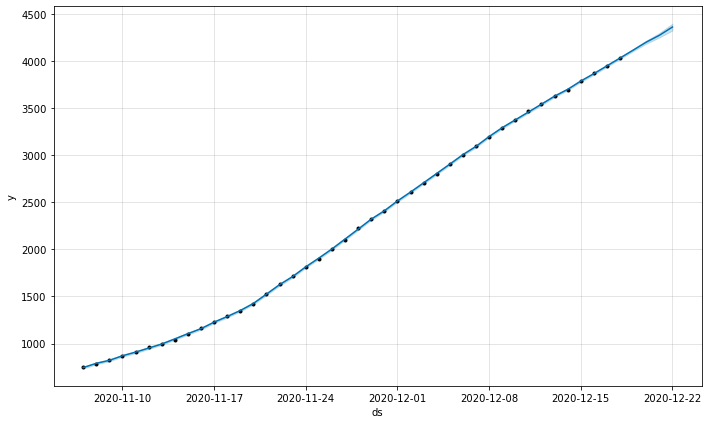

In [30]:
forecast_total_deaths_plot=m.plot(forecast_total_deaths)

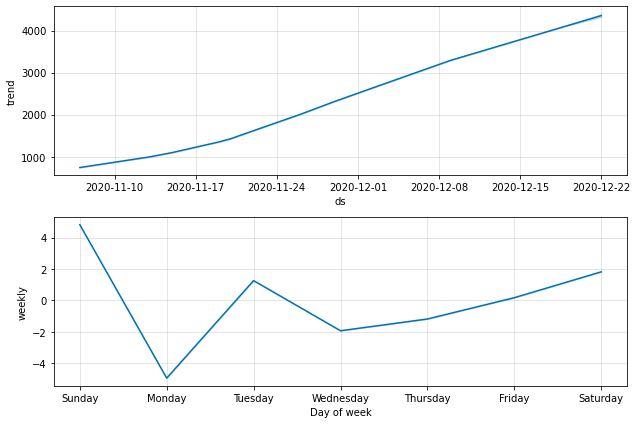

In [31]:
forecast_total_deaths_plot=m.plot_components(forecast_total_deaths)

## Prediction of new deaths <a name="prediction_new_deaths"></a>

In [32]:
new_deaths.tail()

,Date_reported,New_deaths
37,2020-12-14,62
38,2020-12-15,98
39,2020-12-16,85
40,2020-12-17,78
41,2020-12-18,96


In [33]:
new_deaths.columns=['ds','y']

In [34]:
m=Prophet(interval_width=0.95)
m.fit(new_deaths)
future_new_deaths=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
forecast_new_deaths=m.predict(future_new_deaths)
forecast_new_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
42,2020-12-19,109.253198,75.707897,144.567912
43,2020-12-20,113.575567,80.869219,147.459671
44,2020-12-21,101.424326,66.589310,141.491045
45,2020-12-22,117.394618,82.968455,150.297733


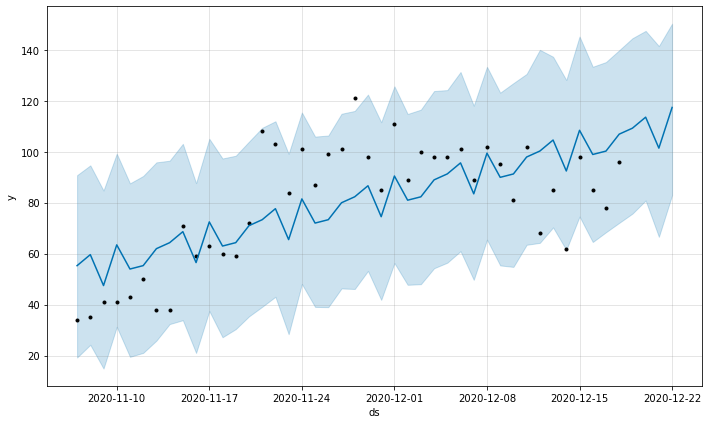

In [36]:
forecast_new_deaths_plot=m.plot(forecast_new_deaths)

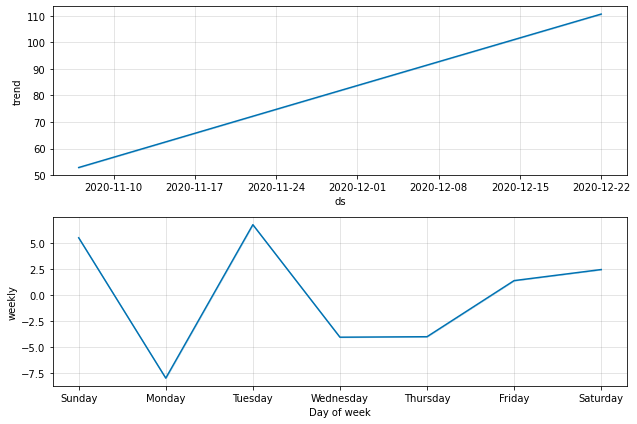

In [37]:
forecast_new_deaths_plot=m.plot_components(forecast_new_deaths)

## Prediction of new cases<a name="prediction_new_cases"></a>

In [38]:
new_cases.tail()

,Date_reported,New_cases
37,2020-12-14,639
38,2020-12-15,1199
39,2020-12-16,1190
40,2020-12-17,1155
41,2020-12-18,916


In [39]:
new_cases.columns=['ds','y']

In [40]:
m=Prophet(interval_width=0.95)
m.fit(new_cases)
future_new_cases=m.make_future_dataframe(periods=4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast_new_cases=m.predict(future_new_cases)
forecast_new_cases[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)

,ds,yhat,yhat_lower,yhat_upper
42,2020-12-19,863.731608,318.693111,1362.997844
43,2020-12-20,171.263222,-327.845085,672.578787
44,2020-12-21,194.124053,-296.951197,707.865220
45,2020-12-22,802.922733,288.875088,1295.157061


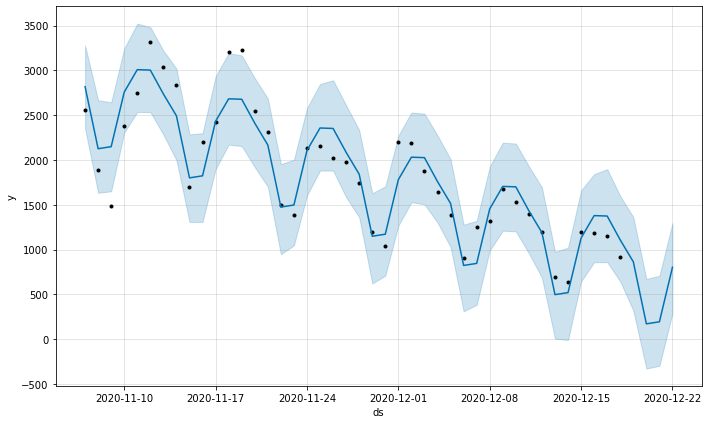

In [42]:
forecast_new_cases_plot=m.plot(forecast_new_cases)

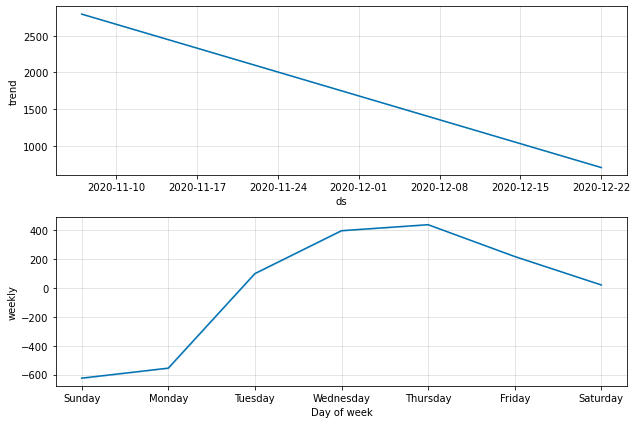

In [43]:
forecast_new_cases_plot=m.plot_components(forecast_new_cases)